# **Data Visualization**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Visualizing distribution of data


### Histograms


Histogram of `ConvertedComp.`


In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# SQL query to extract the "ConvertedComp" column from the "master" table
query = "SELECT ConvertedComp FROM master"

# Use pd.read_sql_query to execute the query and create a DataFrame
df1 = pd.read_sql_query(query, conn)





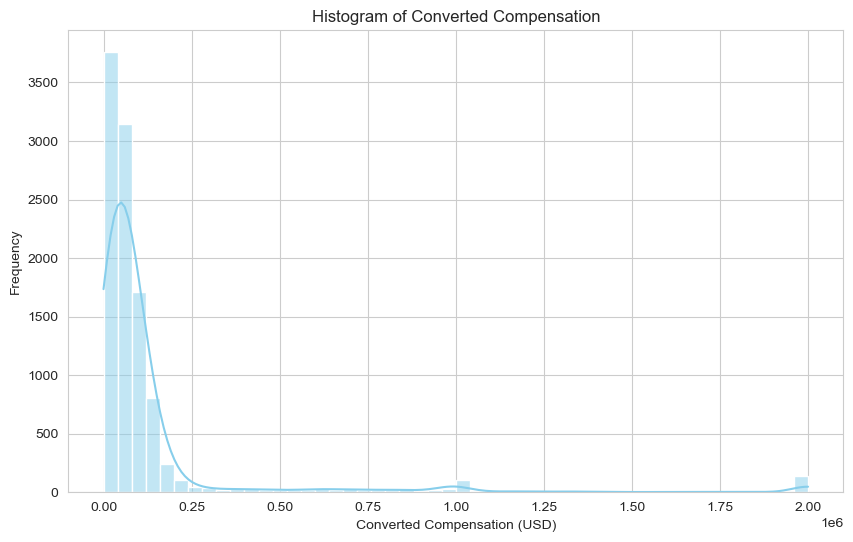

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x="ConvertedComp", bins=50, kde=True, color="skyblue")
plt.title("Histogram of Converted Compensation")
plt.xlabel("Converted Compensation (USD)")
plt.ylabel("Frequency")
plt.show()


### Box Plots


Box plot of `Age.`


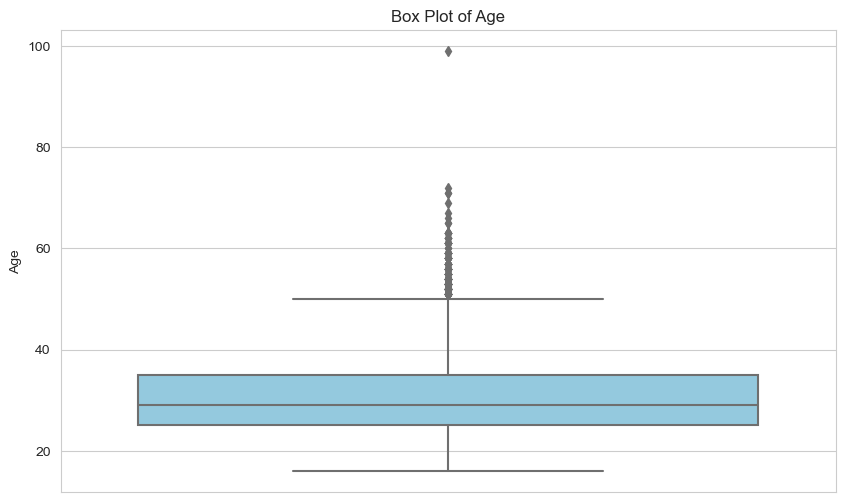

In [32]:

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the SQL query to extract the "Age" column
sql_query = "SELECT Age FROM master"

# Execute the SQL query and store the results in a DataFrame
df_age = pd.read_sql_query(sql_query, conn)



# Plot a box plot of the "Age" column using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(data=df_age, y="Age", color="skyblue")
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()



## Visualizing relationships in data


### Scatter Plots


Created a scatter plot of `Age` and `WorkWeekHrs.`


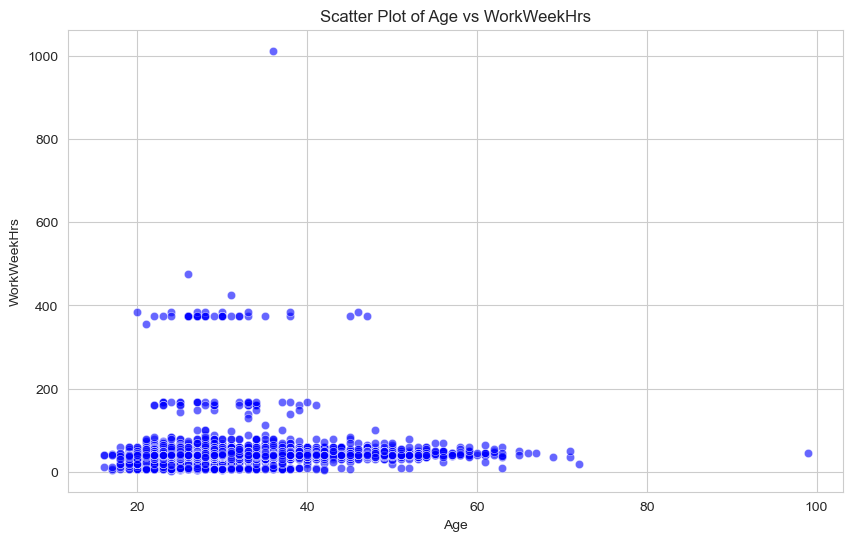

In [33]:

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the SQL query to extract 'Age' and 'WorkWeekHrs'
sql_query = "SELECT Age, WorkWeekHrs FROM master"

# Execute the SQL query and store the results in a DataFrame
df_age_workweek = pd.read_sql_query(sql_query, conn)


# Create a scatter plot of 'Age' and 'WorkWeekHrs' using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=df_age_workweek, x="Age", y="WorkWeekHrs", color="blue", alpha=0.6)
plt.title("Scatter Plot of Age vs WorkWeekHrs")
plt.xlabel("Age")
plt.ylabel("WorkWeekHrs")
plt.show()



### Bubble Plots


Created a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


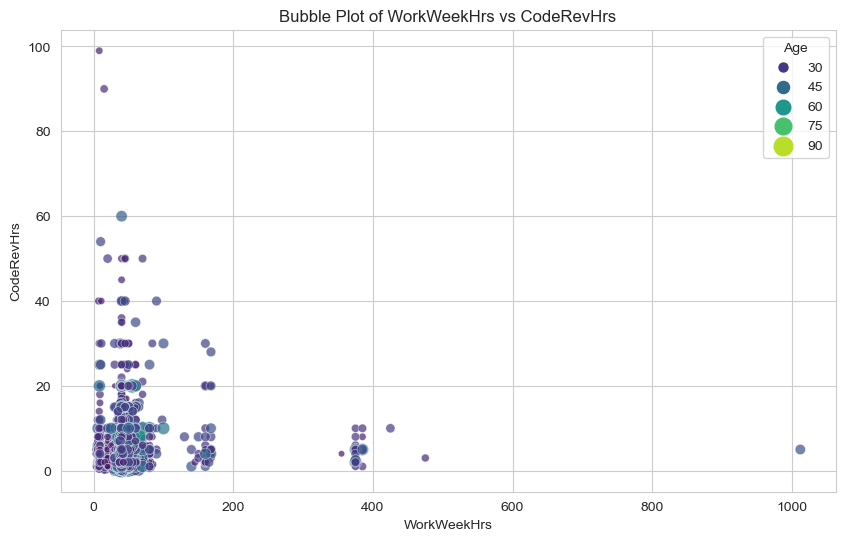

In [34]:

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the SQL query to extract 'WorkWeekHrs', 'CodeRevHrs', and 'Age'
sql_query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"

# Execute the SQL query and store the results in a DataFrame
df_workweek_code_age = pd.read_sql_query(sql_query, conn)


# Create a bubble plot of 'WorkWeekHrs' and 'CodeRevHrs' with 'Age' as the bubble size using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=df_workweek_code_age, x="WorkWeekHrs", y="CodeRevHrs", hue="Age", size="Age", sizes=(10, 200), palette="viridis", alpha=0.7)
plt.title("Bubble Plot of WorkWeekHrs vs CodeRevHrs")
plt.xlabel("WorkWeekHrs")
plt.ylabel("CodeRevHrs")
plt.show()



## Visualizing composition of data


### Pie Charts


Created a pie chart of the top 5 databases that respondents wish to learn next year. 


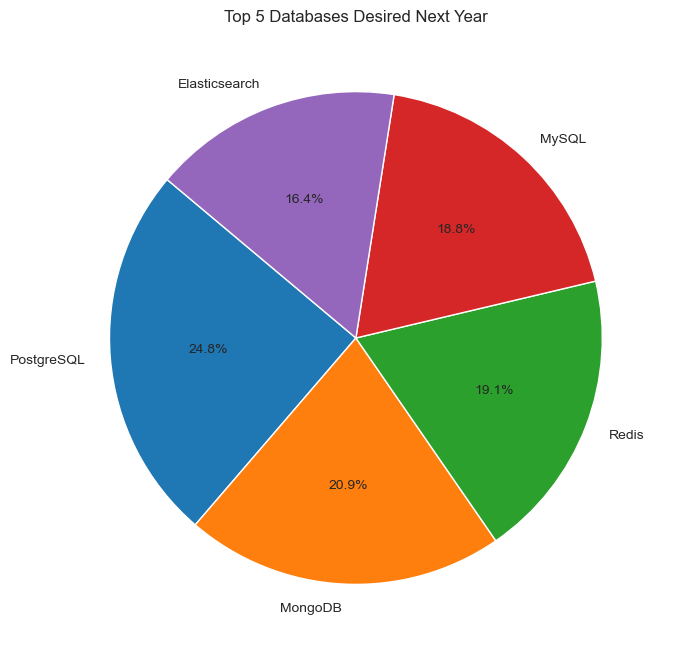

In [35]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the SQL query to extract the top 5 databases from the 'DatabaseDesireNextYear' column
sql_query = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

# Execute the SQL query and store the results in a DataFrame
df_top_databases = pd.read_sql_query(sql_query, conn)



# Create a pie chart of the top 5 databases using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(df_top_databases['Count'], labels=df_top_databases['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases Desired Next Year")
plt.show()




### Stacked Charts


Creatd a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


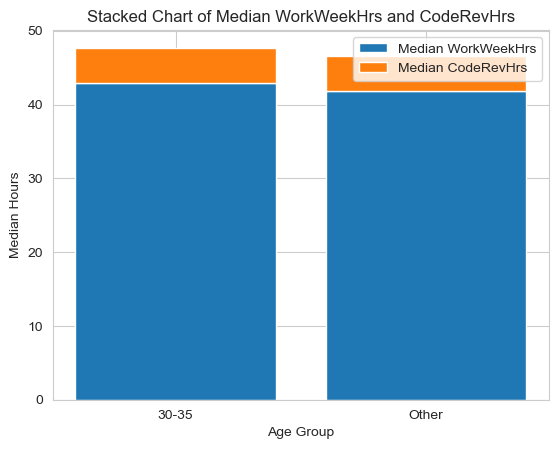

In [38]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# SQL query to extract the required columns and calculate medians
sql_query = """
SELECT Age, 
       CASE 
           WHEN Age BETWEEN 30 AND 35 THEN '30-35'
           ELSE 'Other'
       END AS Age_Group,
       AVG(WorkWeekHrs) AS Median_WorkWeekHrs,
       AVG(CodeRevHrs) AS Median_CodeRevHrs
FROM master
GROUP BY Age_Group
"""

# Execute the SQL query and store the results in a DataFrame
df_stacked_chart = pd.read_sql_query(sql_query, conn)

# Create a stacked chart using Matplotlib
age_groups = df_stacked_chart['Age_Group']
work_week_hrs = df_stacked_chart['Median_WorkWeekHrs']
code_rev_hrs = df_stacked_chart['Median_CodeRevHrs']

fig, ax = plt.subplots()
ax.bar(age_groups, work_week_hrs, label='Median WorkWeekHrs')
ax.bar(age_groups, code_rev_hrs, bottom=work_week_hrs, label='Median CodeRevHrs')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Hours')
ax.set_title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs')
ax.legend()

plt.show()







## Visualizing comparison of data


### Line Chart


Plotted the median `ConvertedComp` for all ages from 45 to 60.


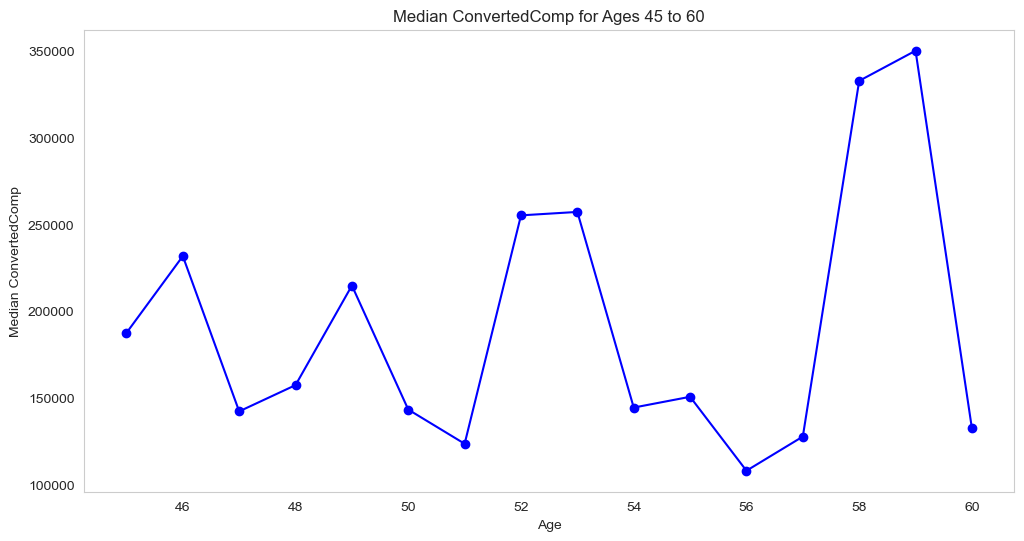

In [39]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# SQL query to extract the required columns and calculate the median
sql_query = """
SELECT Age, AVG(ConvertedComp) AS Median_ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
"""

# Execute the SQL query and store the results in a DataFrame
df_median_comp = pd.read_sql_query(sql_query, conn)

# Create a plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_median_comp['Age'], df_median_comp['Median_ConvertedComp'], marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.grid()
plt.show()



### Bar Chart


Created a horizontal bar chart using column `MainBranch.`


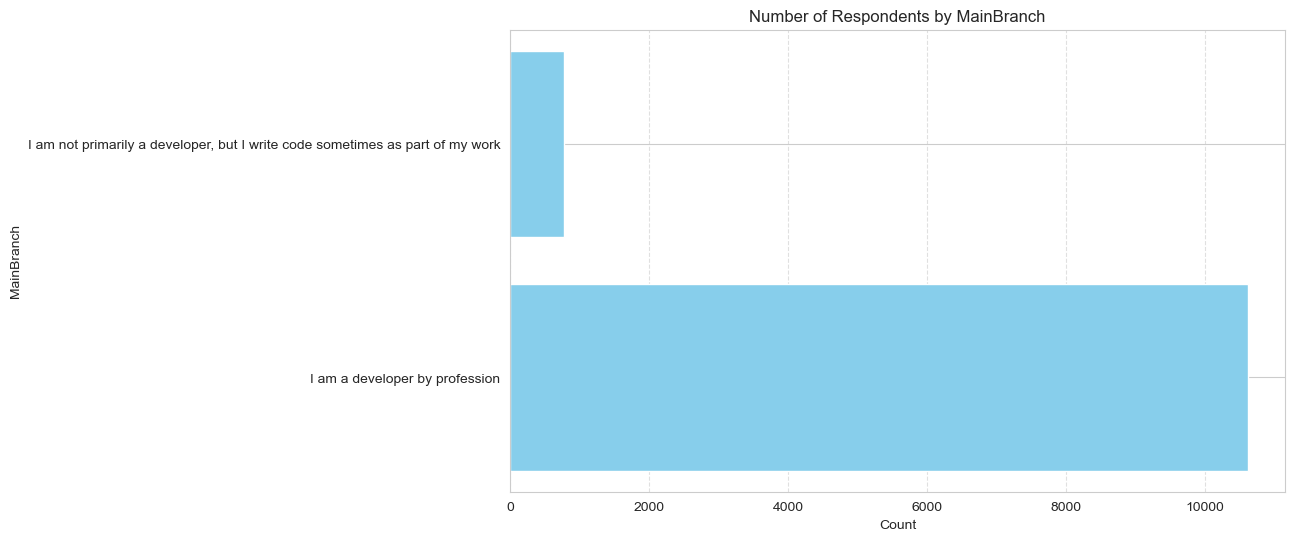

In [40]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# SQL query to count the number of occurrences for each value in the 'MainBranch' column
sql_query = """
SELECT MainBranch, COUNT(*) AS Count
FROM master
GROUP BY MainBranch
"""

# Execute the SQL query and store the results in a DataFrame
df_main_branch = pd.read_sql_query(sql_query, conn)

# Create a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_main_branch['MainBranch'], df_main_branch['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Number of Respondents by MainBranch')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



Closed the database connection.


In [41]:
conn.close()

In [51]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Create a cursor
cursor = conn.cursor()

# Write the SQL query to find the rank of Python
sql_query = """
SELECT LanguageDesireNextYear, RANK() OVER (ORDER BY COUNT(*) DESC) AS Rank
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear

"""

# Execute the query
cursor.execute(sql_query)

# Fetch the result
rank = cursor.fetchall()

print(rank)

# Close the cursor and the connection
cursor.close()
conn.close()



[('JavaScript', 1), ('HTML/CSS', 2), ('Python', 3), ('SQL', 4), ('TypeScript', 5), ('C#', 6), ('Bash/Shell/PowerShell', 7), ('Java', 8), ('Go', 9), ('Kotlin', 10), ('C++', 11), ('Rust', 12), ('PHP', 13), ('WebAssembly', 14), ('Swift', 15), ('Ruby', 16), ('C', 17), ('Scala', 18), ('R', 19), ('Other(s):', 20), ('F#', 21), ('Elixir', 22), ('Dart', 23), ('Clojure', 24), ('Assembly', 25), ('Objective-C', 26), ('Erlang', 26), ('VBA', 28)]


In [52]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Create a cursor
cursor = conn.cursor()

# Write the SQL query to count respondents working with 'SQL'
sql_query = """
SELECT COUNT(*) as SQL_Workers
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
"""

# Execute the query
cursor.execute(sql_query)

# Fetch the result
result = cursor.fetchall()

print(result)

# Close the cursor and the connection
cursor.close()
conn.close()


[(5469,)]


In [46]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Create a cursor
cursor = conn.cursor()

# Write the SQL query to count respondents working on 'MySQL' only
sql_query = """
SELECT COUNT(*) as MySQL_Only_Workers
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
  AND NOT EXISTS (
    SELECT 1
    FROM DatabaseWorkedWith AS d2
    WHERE d2.Respondent = DatabaseWorkedWith.Respondent
      AND d2.DatabaseWorkedWith != 'MySQL'
  )
"""

# Execute the query
cursor.execute(sql_query)

# Fetch the result
result = cursor.fetchone()

# Check if there are any respondents working on 'MySQL' only
if result:
    mysql_only_workers_count = result[0]
    print(f"The number of respondents working on 'MySQL' only is {mysql_only_workers_count}")
else:
    print("No respondents indicated that they work on 'MySQL' only.")

# Close the cursor and the connection
cursor.close()
conn.close()


The number of respondents working on 'MySQL' only is 474


In [58]:
import sqlite3


# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Create a cursor
cursor = conn.cursor()

# Write the SQL query to find the majority job title
query = """
SELECT DevType, COUNT(*) as count 
FROM DevType
GROUP BY DevType 
ORDER BY count DESC 
LIMIT 1

"""

# Execute the query
cursor.execute(query)

# Fetch the result
result = cursor.fetchone()

# Close the database connection
conn.close()

# Print the majority job title
majority_job = result[0]
print("Majority of the survey responders are:", majority_job)





Majority of the survey responders are: Developer, full-stack


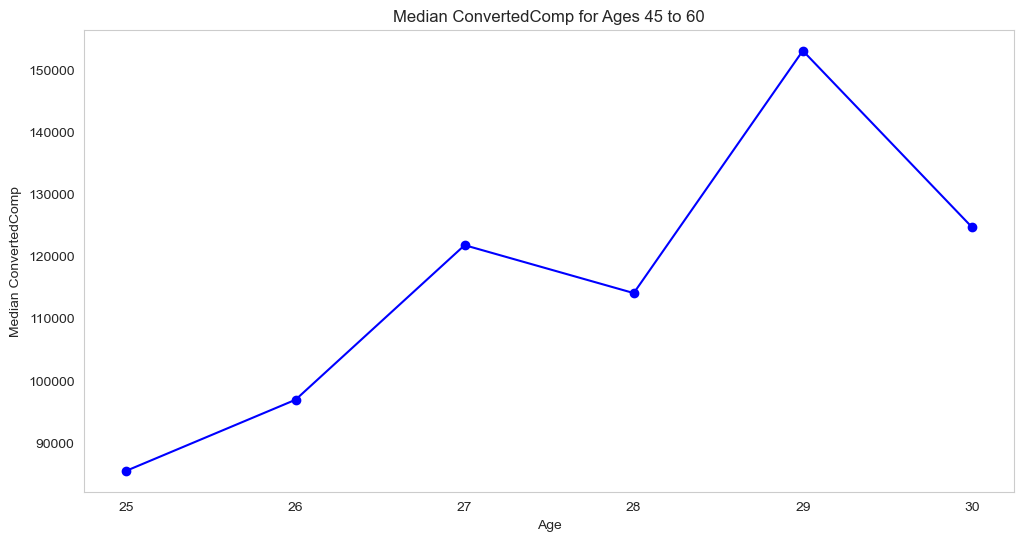

In [59]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# SQL query to extract the required columns and calculate the median
sql_query = """
SELECT Age, AVG(ConvertedComp) AS Median_ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
GROUP BY Age
"""

# Execute the SQL query and store the results in a DataFrame
df_median_comp = pd.read_sql_query(sql_query, conn)

# Create a plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_median_comp['Age'], df_median_comp['Median_ConvertedComp'], marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.grid()
plt.show()

conn.close()

## Author


Karim Ali
